# <center> Assignment 2: HR Analytics - Job Change of Data Scientists </center>

## Data

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

- The dataset is imbalanced.
- Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
- Missing imputation can be a part of your pipeline as well.

Ref: [HR Analytics - Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)
**Data Descriptions**:

|Features|Descriptions
|-|-|
|enrollee_id| Unique ID for candidate|
|city| City code|
|city_ development _index| Developement index of the city (scaled)|
|gender| Gender of candidate|
|relevent_experience| Relevant experience of candidate|
|enrolled_university| Type of University course enrolled if any|
|education_level| Education level of candidate|
|major_discipline|Education major discipline of candidate|
|experience| Candidate total experience in years|
|company_size| No of employees in current employer's company|
|company_type| Type of current employer|
|lastnewjob| Difference in years between previous job and current job|
|training_hours| training hours completed|
|target| 0 – Not looking for job change, 1 – Looking for a job change|

## 1. Import libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
job = pd.read_csv('train.csv')
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## 2. Sanity check

In [3]:
## Kiểm tra kiểu dữ liệu từng cột, có tổng bao nhiêu cột và bao nhiêu hàng
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
# Kiểm tra tỉ lệ % missing value
job.isnull().sum()/len(job)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [5]:
job.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Process missing value in `Experience`

In [6]:
data2 = job[job['experience'].isnull()]
data2

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
135,23947,city_103,0.920,NaN,No relevent experience,no_enrollment,Phd,STEM,NaN,NaN,NaN,NaN,70,0.0
391,12038,city_90,0.698,Male,Has relevent experience,Full time course,Masters,NaN,NaN,NaN,NaN,NaN,44,1.0
1589,17642,city_134,0.698,NaN,No relevent experience,no_enrollment,NaN,NaN,NaN,NaN,NaN,never,33,0.0
2727,14965,city_103,0.920,NaN,Has relevent experience,no_enrollment,Masters,STEM,NaN,NaN,NaN,NaN,70,0.0
2859,24875,city_103,0.920,NaN,No relevent experience,Full time course,Graduate,STEM,NaN,10/49,NaN,1,41,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,9158,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,NaN,5000-9999,NaN,1,13,1.0
18055,32626,city_150,0.698,Other,Has relevent experience,NaN,NaN,NaN,NaN,10/49,NaN,1,51,1.0
18143,2299,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,NaN,10/49,NaN,NaN,182,1.0
18790,21862,city_114,0.926,NaN,Has relevent experience,NaN,Graduate,STEM,NaN,50-99,NGO,1,138,0.0


In [7]:
data2.city.value_counts()

city_103    18
city_21     17
city_134     4
city_16      3
city_114     2
city_11      2
city_136     2
city_36      2
city_90      2
city_73      2
city_116     1
city_102     1
city_19      1
city_91      1
city_123     1
city_126     1
city_99      1
city_145     1
city_138     1
city_67      1
city_150     1
Name: city, dtype: int64

In [8]:
data2.training_hours.max()

256

In [9]:
data2.relevent_experience.value_counts()

Has relevent experience    44
No relevent experience     21
Name: relevent_experience, dtype: int64

Hypotheis 1: Những người bị missing value có xu hướng **tập trung về city_103 và city_21** và **thời gian training < 256** và phần lớn **đều có kinh nghiệm liên quan**

In [10]:
data_exp = job.query("city=='city_103' | city=='city_21' & training_hours<256 & relevent_experience=='Has relevent experience'")

In [11]:
data_exp.experience.value_counts()

>20    1217
5       488
4       460
3       441
6       419
7       339
2       302
10      296
9       294
8       257
15      213
11      189
14      158
16      158
1       154
<1      151
12      143
13      123
17      108
19       99
18       92
20       57
Name: experience, dtype: int64

In [12]:
## Fill experience với giá trị >20
job['experience'] = job['experience'].fillna('>20') 

In [13]:
## Kiểm tra missing value
job.experience.isnull().sum()

0

### Process missing value in `gender`

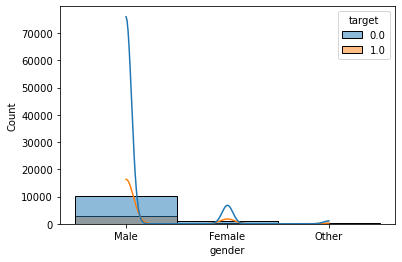

In [14]:
sns.histplot(data=job,x='gender',hue='target',kde=True)
plt.show()

**=> Hầu hết đều tập trung vào giới tính nam, giới tính nữ và giới tính khác thấp hơn rất nhiều**

In [15]:
job.pivot_table(index='gender',columns='city', values='target', aggfunc='count')

city,city_1,city_10,city_100,city_101,city_102,city_103,city_104,city_105,city_106,city_107,...,city_84,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
gender,,,,,,,,,,,,,,,,,,,,,
Female,1.0,3.0,5.0,NaN,16.0,420.0,10.0,8.0,NaN,NaN,...,NaN,7.0,2.0,9.0,3.0,1.0,1.0,3.0,3.0,10.0
Male,23.0,64.0,201.0,54.0,209.0,3099.0,231.0,57.0,7.0,3.0,...,23.0,42.0,8.0,119.0,25.0,21.0,21.0,82.0,58.0,65.0
Other,NaN,5.0,2.0,NaN,2.0,60.0,4.0,2.0,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3.0,1.0


In [16]:
gender_percent = job['gender'].value_counts().to_frame()
gender_percent

,gender
Male,13221
Female,1238
Other,191


In [17]:
## Ta sẽ fill dữ liệu gender theo tỉ lệ 13221:1238:191 = 69:6:1

In [18]:
job.gender.value_counts(dropna=False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [19]:
job['gender'] = job.gender.fillna('Male',limit=4092).fillna('Female',limit=340).fillna('Other',limit=76)

In [20]:
## Kiểm tra missing value cho cột gender
job.gender.isnull().sum()

0

### Process missing value in `major_discipline`

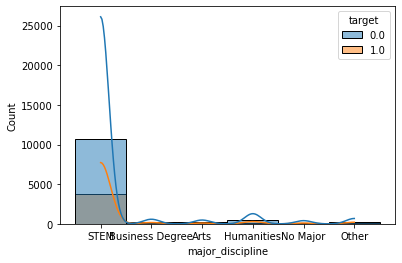

In [21]:
sns.histplot(data=job,x='major_discipline',hue='target',kde=True)
plt.show()

In [22]:
job.pivot_table(index='major_discipline',columns='city', values='target', aggfunc='count')

city,city_1,city_10,city_100,city_101,city_102,city_103,city_104,city_105,city_106,city_107,...,city_84,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
major_discipline,,,,,,,,,,,,,,,,,,,,,
Arts,NaN,1.0,2.0,NaN,1.0,134.0,6.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0
Business Degree,NaN,1.0,5.0,1.0,8.0,128.0,6.0,5.0,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,3.0
Humanities,NaN,2.0,8.0,1.0,10.0,302.0,7.0,6.0,NaN,NaN,...,NaN,1.0,NaN,1.0,2.0,NaN,NaN,4.0,2.0,4.0
No Major,2.0,1.0,7.0,1.0,5.0,65.0,2.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN
Other,1.0,2.0,5.0,2.0,7.0,115.0,11.0,2.0,NaN,1.0,...,NaN,NaN,2.0,NaN,2.0,NaN,NaN,2.0,1.0,NaN
STEM,20.0,64.0,166.0,58.0,230.0,3211.0,203.0,50.0,8.0,5.0,...,20.0,54.0,11.0,169.0,33.0,15.0,23.0,79.0,61.0,71.0


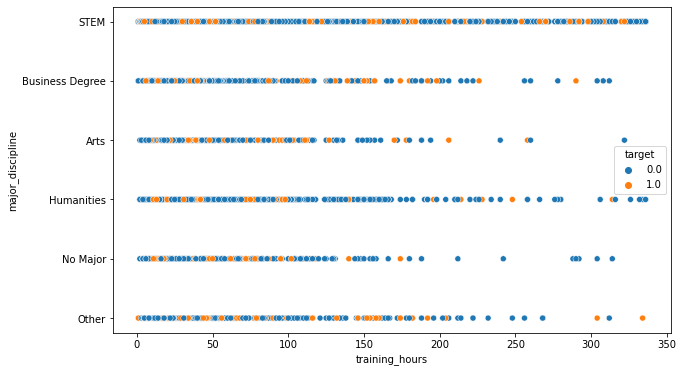

In [23]:
#Hypothesis 2: Có mối tương quan nào giữa ngành học với thời gian đào tạo hay không?
plt.figure(figsize=(10,6))
sns.scatterplot(data=job,x='training_hours',y='major_discipline',hue='target')
plt.show()

=> Hypo 2 False vì không có mối tương quan nào rõ ràng

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

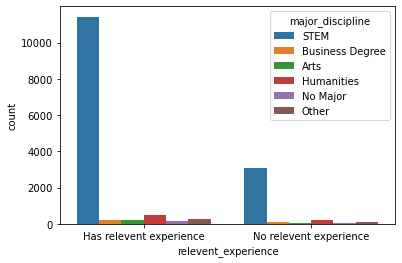

In [24]:
sns.countplot(data=job, x='relevent_experience',hue='major_discipline')

In [25]:
##STEM chiếm tỉ lệ rất lớn khi so sánh với các ngành còn lại
job.major_discipline = job.major_discipline.fillna('STEM')

In [26]:
#Kiểm tra missing value
job.major_discipline.isnull().sum()

0

### Process missing value in `company_size`

In [27]:
job.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline             0
experience                   0
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [28]:
job.company_size.value_counts(dropna=False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [29]:
job.pivot_table(index='company_size',columns='city', values='target', aggfunc='count')

city,city_1,city_10,city_100,city_101,city_102,city_103,city_104,city_105,city_106,city_107,...,city_84,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
company_size,,,,,,,,,,,,,,,,,,,,,
10/49,3.0,12.0,19.0,12.0,14.0,224.0,23.0,4.0,2.0,NaN,...,1.0,4.0,1.0,18.0,9.0,3.0,1.0,11.0,4.0,10.0
100-500,3.0,11.0,27.0,7.0,39.0,624.0,33.0,21.0,NaN,1.0,...,4.0,9.0,5.0,21.0,4.0,2.0,NaN,16.0,9.0,10.0
1000-4999,NaN,6.0,11.0,1.0,24.0,383.0,28.0,2.0,NaN,NaN,...,NaN,5.0,NaN,5.0,NaN,NaN,NaN,10.0,10.0,9.0
10000+,2.0,5.0,10.0,NaN,18.0,696.0,28.0,3.0,1.0,1.0,...,NaN,6.0,NaN,3.0,2.0,3.0,1.0,7.0,4.0,4.0
50-99,5.0,19.0,42.0,13.0,54.0,612.0,63.0,17.0,NaN,NaN,...,7.0,14.0,3.0,29.0,1.0,9.0,5.0,19.0,13.0,15.0
500-999,1.0,6.0,13.0,1.0,22.0,217.0,10.0,1.0,NaN,NaN,...,1.0,3.0,NaN,2.0,2.0,1.0,NaN,7.0,7.0,4.0
5000-9999,2.0,1.0,4.0,NaN,16.0,160.0,6.0,1.0,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,4.0,6.0
<10,3.0,10.0,30.0,12.0,14.0,183.0,28.0,9.0,NaN,NaN,...,1.0,6.0,5.0,23.0,1.0,2.0,4.0,7.0,12.0,11.0


In [30]:
# Hypothesis: City_development_index có mối tương quan nào với Company_size không?
# Chia nhỏ danh sách city_development_index thành nhiều cụm nhỏ để nhìn rõ sự phân bố

In [31]:
data00 = job[(job['city_development_index']>=0.4)&(job['city_development_index']<0.6)]
data01 = job[(job['city_development_index']>=0.6)&(job['city_development_index']<0.7)]
data02 = job[(job['city_development_index']>=0.7)&(job['city_development_index']<0.75)]
data10 = job[(job['city_development_index']>=0.75)&(job['city_development_index']<0.8)]
data11 = job[(job['city_development_index']>=0.8)&(job['city_development_index']<0.85)]
data12 = job[(job['city_development_index']>=0.85)&(job['city_development_index']<1)]

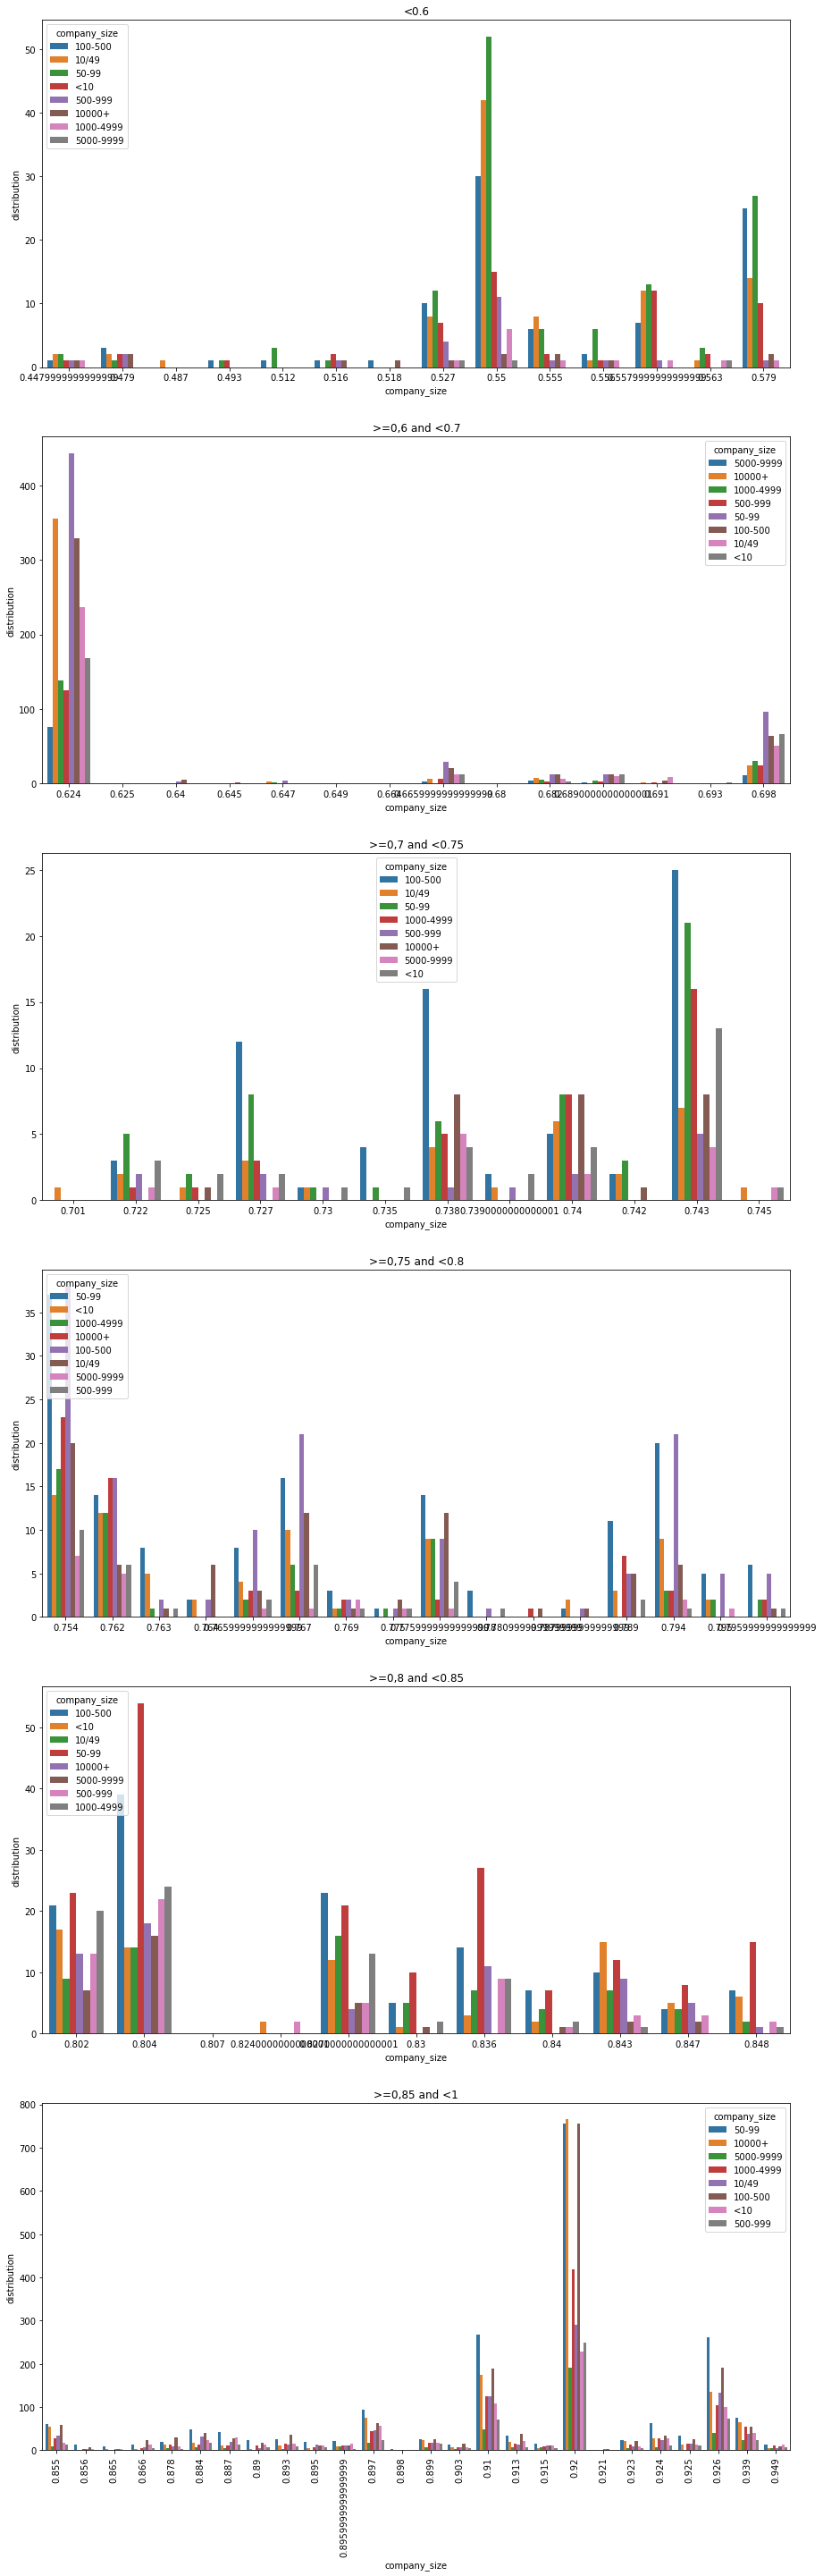

In [32]:
fig, ax = plt.subplots(6,1,figsize=(15,50))
sns.countplot(data=data00, x='city_development_index',hue='company_size', ax=ax[0])
plt.xticks(rotation=90)
ax[0].set(xlabel='company_size',ylabel='distribution',title='<0.6')
sns.countplot(data=data01, x='city_development_index',hue='company_size', ax=ax[1])
plt.xticks(rotation=90)
ax[1].set(xlabel='company_size',ylabel='distribution',title='>=0,6 and <0.7')
sns.countplot(data=data02, x='city_development_index',hue='company_size', ax=ax[2])
plt.xticks(rotation=90)
ax[2].set(xlabel='company_size',ylabel='distribution',title='>=0,7 and <0.75')
sns.countplot(data=data10, x='city_development_index',hue='company_size', ax=ax[3])
plt.xticks(rotation=90)
ax[3].set(xlabel='company_size',ylabel='distribution',title='>=0,75 and <0.8')
sns.countplot(data=data11, x='city_development_index',hue='company_size', ax=ax[4])
plt.xticks(rotation=90)
ax[4].set(xlabel='company_size',ylabel='distribution',title='>=0,8 and <0.85')
sns.countplot(data=data12, x='city_development_index',hue='company_size', ax=ax[5])
ax[5].set(xlabel='company_size',ylabel='distribution',title='>=0,85 and <1')
plt.show()

In [33]:
# Hypo 4: Có mối tương quan nào giữa các thành phố với quy mô công ty hay không? (City vs. Company_size)

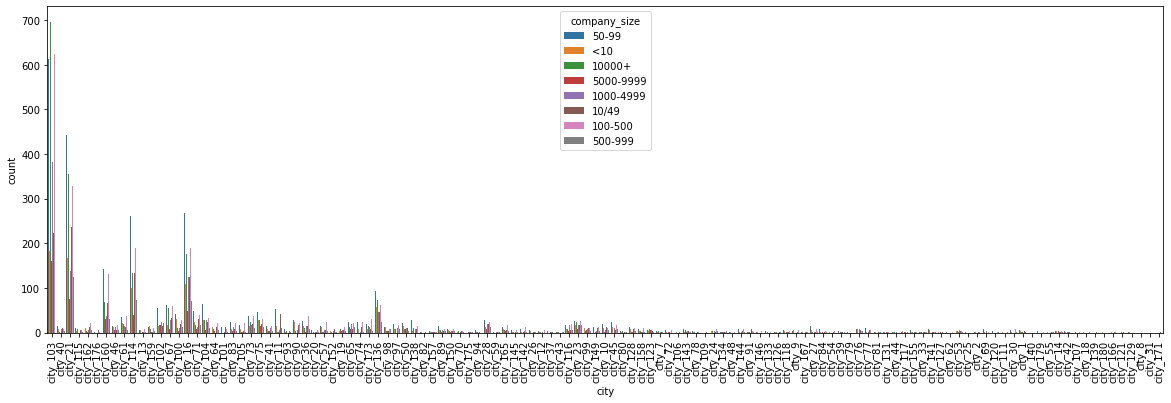

In [34]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(data=job, x='city',hue='company_size')
plt.show()

In [35]:
## Các nhóm thành phố này tập trung chính vào quy mô nhân sự từ 50-99, 100-500 và 10000+

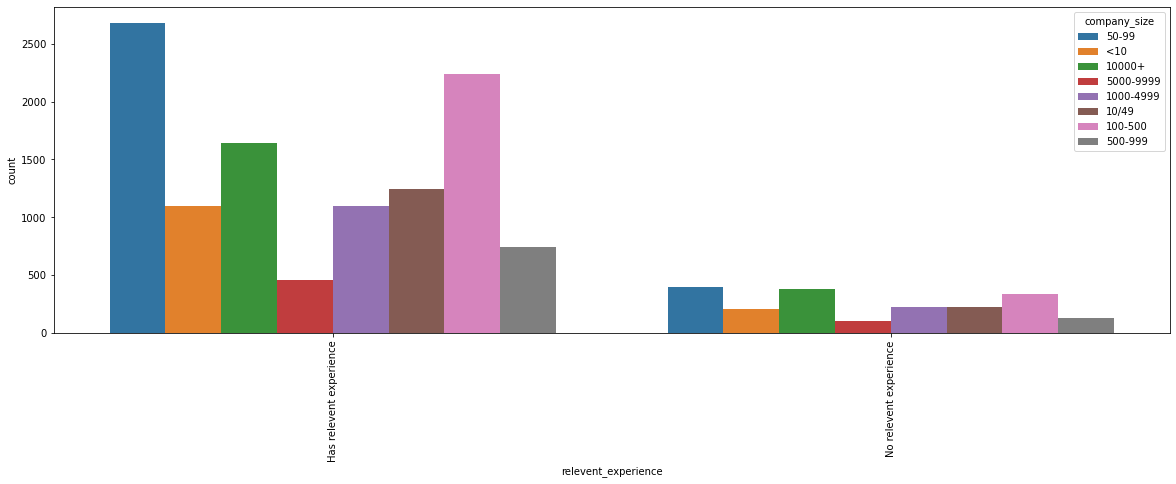

In [36]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(data=job, x='relevent_experience',hue='company_size')
plt.show()

Mối tương quan giữa các kinh nghiệm liên quan, thành phố và chỉ số phát triển của thành phố đều cho thấy công ty quy mô nhân sự từ 50-99, 100-500 và 10000+ vượt trội hơn hẳn

In [37]:
job['company_size'].isnull().sum()

5938

In [38]:
job['company_size'] = job.company_size.fillna('50-99',limit=1980).fillna('100-500',limit=1979).fillna('10000+',limit=1979)
#Fill theo tỉ lệ 3:3:3

In [39]:
job['company_size'].isnull().sum()

0

### Process missing value in `enrolled_university`

In [40]:
job.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline             0
experience                   0
company_size                 0
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [41]:
job.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [42]:
job.pivot_table(index='enrolled_university',columns='relevent_experience', values='target', aggfunc='count')

relevent_experience,Has relevent experience,No relevent experience
enrolled_university,,
Full time course,1444,2313
Part time course,817,381
no_enrollment,11336,2481


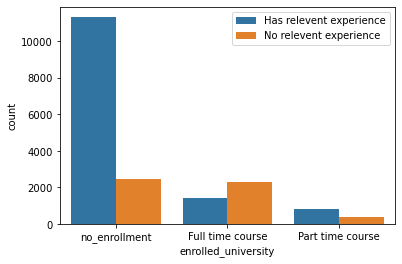

In [43]:
sns.countplot(data=job, x='enrolled_university', hue='relevent_experience')
plt.legend(loc='upper right')
plt.show()

In [44]:
# no_enrollment và parttime_course sẽ thường có kinh nghiệm liên quan và fulltime_course sẽ không có kinh nghiệm liên quan
#Hypothesis 4:
# relevent_experience = has relevent => no_enrollment & parttime course
# relevent_experience = has no relevent => fulltime course
enroll_dict = {'Has relevent experience':'no_enrollment', 'Has relevent experience':'Part time course', 'No relevent experience':'Full time course'}
repl = job['relevent_experience'].map(enroll_dict)
repl.value_counts()

Part time course    13792
Full time course     5366
Name: relevent_experience, dtype: int64

In [45]:
new_enroll = job['enrolled_university'].combine_first(repl)
new_enroll

0           no_enrollment
1           no_enrollment
2        Full time course
3        Full time course
4           no_enrollment
               ...       
19153       no_enrollment
19154       no_enrollment
19155       no_enrollment
19156       no_enrollment
19157       no_enrollment
Name: enrolled_university, Length: 19158, dtype: object

In [46]:
#Check missing value in enrolled_university
job.enrolled_university = new_enroll
job.enrolled_university.value_counts(dropna=False)

no_enrollment       13817
Full time course     3948
Part time course     1393
Name: enrolled_university, dtype: int64

### Process missing value in `education_level`

In [47]:
job.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

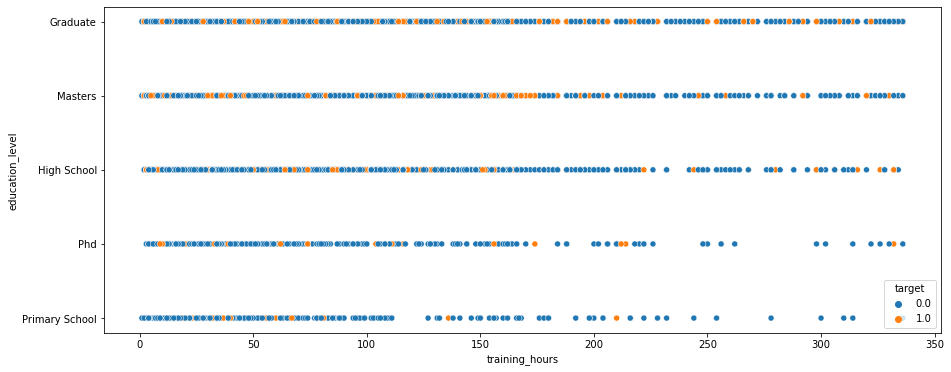

In [48]:
#Hypothesis 5: Có mối tương quan nào giữa trình độ học vấn với thời gian đào tạo hay không?
plt.figure(figsize=(15,6))
sns.scatterplot(data=job,x='training_hours',y='education_level',hue='target')
plt.show()

In [49]:
# Những người học bằng Masters với thời gian đào tạo từ 150-180h thường sẽ có target = 1 (làm việc về Data)

In [50]:
data5 = job.query("education_level=='Masters' & training_hours <180 & training_hours>150")

In [51]:
data5.education_level.isnull().sum()

0

In [52]:
job.education_level.isnull().sum()

460

In [53]:
job.pivot_table(index='education_level',columns='relevent_experience', values='target', aggfunc='count')

relevent_experience,Has relevent experience,No relevent experience
education_level,,
Graduate,8898,2700
High School,781,1236
Masters,3577,784
Phd,259,155
Primary School,66,242


In [54]:
# Hypothesis 6:
# relevent_experience = Has relevent experience => education_level = Graduate, Masters, PhD
# relevent_experience = No relevent experience => education_level = Primary School, High School
unilv_dict = {'Has relevent experience':'Graduate', 
               'Has relevent experience':'Masters', 
               'Has relevent experience':'PhD',
               'No relevent experience':'Primary School',
              'No relevent experience':'High School'}
repl1 = job['relevent_experience'].map(unilv_dict)
repl1.value_counts()

PhD            13792
High School     5366
Name: relevent_experience, dtype: int64

In [55]:
new_unilv = job['education_level'].combine_first(repl1)
new_unilv

0              Graduate
1              Graduate
2              Graduate
3              Graduate
4               Masters
              ...      
19153          Graduate
19154          Graduate
19155          Graduate
19156       High School
19157    Primary School
Name: education_level, Length: 19158, dtype: object

In [56]:
# Bổ sung và check missing value
job['education_level'] = new_unilv
job['education_level'].isnull().sum()

0

### Process missing value in `company_type`

In [57]:
job.company_type.value_counts(dropna=False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [58]:
# Hypothesis 6: Company_type có mối quan hệ nào với Company_size không?
job.pivot_table(index='company_type',columns='company_size', values='target', aggfunc='count')

company_size,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
company_type,,,,,,,,
Early Stage Startup,176.0,28.0,NaN,NaN,111.0,2.0,NaN,286.0
Funded Startup,193.0,215.0,NaN,1.0,394.0,54.0,NaN,144.0
NGO,32.0,182.0,73.0,45.0,87.0,37.0,29.0,36.0
Other,12.0,23.0,15.0,20.0,19.0,11.0,7.0,14.0
Public Sector,43.0,192.0,165.0,192.0,162.0,87.0,79.0,35.0
Pvt Ltd,910.0,1982.0,1016.0,1860.0,2287.0,622.0,412.0,728.0


In [59]:
# Các doanh nghiệp start-up thường quy mô nhân sự không nhiều, nên sẽ rất hiếm doanh nghiệp startup nào có quy mô nhân sự >1000

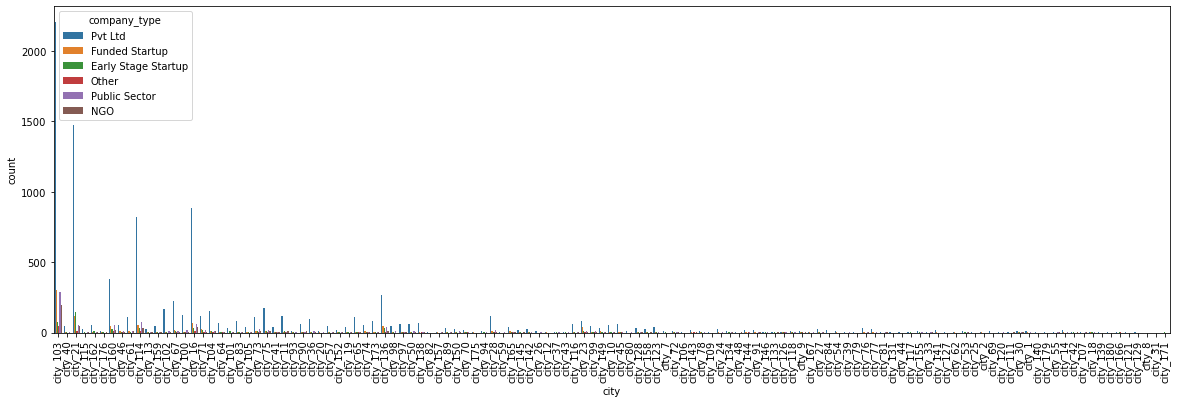

In [60]:
# Hypothesis 7: Loại hình công ty có liên quan tới các chỉ số phát triển thành phố hay không?
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(data=job, x='city',hue='company_type')
plt.show()

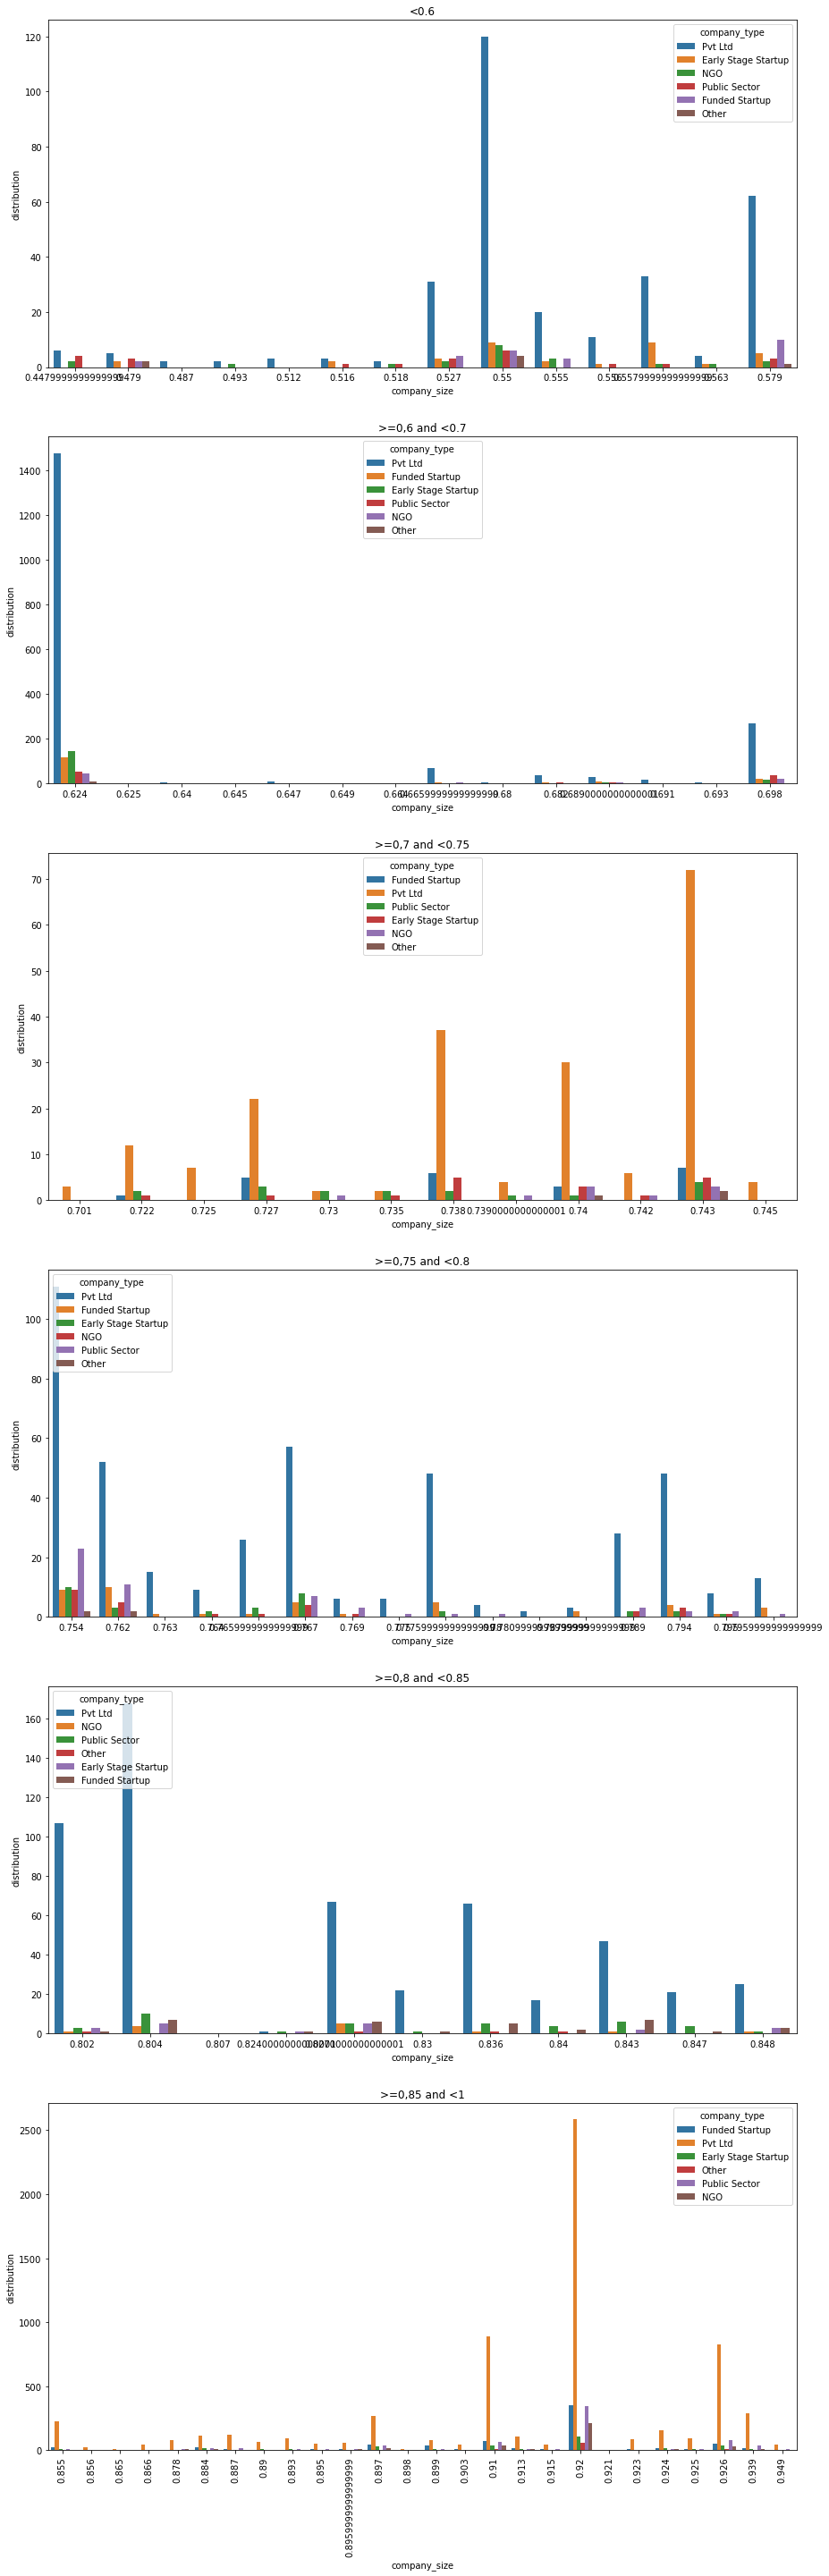

In [61]:
fig, ax = plt.subplots(6,1,figsize=(15,50))
sns.countplot(data=data00, x='city_development_index',hue='company_type', ax=ax[0])
plt.xticks(rotation=90)
ax[0].set(xlabel='company_size',ylabel='distribution',title='<0.6')
sns.countplot(data=data01, x='city_development_index',hue='company_type', ax=ax[1])
plt.xticks(rotation=90)
ax[1].set(xlabel='company_size',ylabel='distribution',title='>=0,6 and <0.7')
sns.countplot(data=data02, x='city_development_index',hue='company_type', ax=ax[2])
plt.xticks(rotation=90)
ax[2].set(xlabel='company_size',ylabel='distribution',title='>=0,7 and <0.75')
sns.countplot(data=data10, x='city_development_index',hue='company_type', ax=ax[3])
plt.xticks(rotation=90)
ax[3].set(xlabel='company_size',ylabel='distribution',title='>=0,75 and <0.8')
sns.countplot(data=data11, x='city_development_index',hue='company_type', ax=ax[4])
plt.xticks(rotation=90)
ax[4].set(xlabel='company_size',ylabel='distribution',title='>=0,8 and <0.85')
sns.countplot(data=data12, x='city_development_index',hue='company_type', ax=ax[5])
ax[5].set(xlabel='company_size',ylabel='distribution',title='>=0,85 and <1')
plt.show()

In [62]:
# Pvt Ltd tập trung chủ yếu tại tất cả các thành phố và chỉ số phát triển không nói lên quá nhiều thông tin
job['company_type'] = job['company_type'].fillna('Pvt Ltd')

In [63]:
# Check missing value
job.company_type.value_counts(dropna=False)

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type, dtype: int64

### Process missing value in `Lastnewjob`

In [64]:
job.last_new_job.value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

In [65]:
# Hypothesis 9: Có mối tương quan nào giữa Exp với last_new_job không?
job.pivot_table(index='experience',columns='last_new_job', values='target', aggfunc='count')

last_new_job,1,2,3,4,>4,never
experience,,,,,,
1,313.0,NaN,NaN,NaN,NaN,204.0
10,432.0,185.0,65.0,79.0,147.0,69.0
11,292.0,131.0,37.0,38.0,121.0,40.0
12,196.0,93.0,35.0,44.0,95.0,25.0
13,148.0,70.0,32.0,34.0,87.0,23.0
14,235.0,93.0,41.0,54.0,136.0,23.0
15,227.0,111.0,66.0,42.0,202.0,36.0
16,163.0,86.0,40.0,41.0,142.0,28.0
17,123.0,55.0,30.0,26.0,100.0,6.0


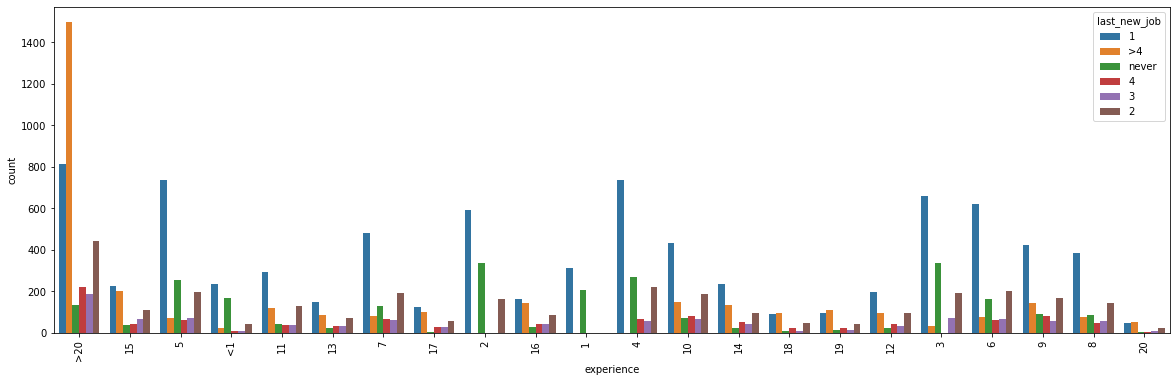

In [66]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(data=job, x='experience',hue='last_new_job')
plt.show()

- Những người từ 0-14 năm kinh nghiệm thường sẽ chuyển việc 1 lần
- Từ 14-20 năm kn sẽ ổn định hơn hoặc chuyển việc nhiều hơn 4 lần. 
- Những người từ 0-5 năm kinh nghiệm thường chưa bao giờ chuyển việc hoặc chuyển 1 lần. 
- Với người 20 năm trở lên thường có xu hướng chuyển việc nhiều hơn 4 lần. 
- Người từ 6-11 năm kinh nghiệm thường chuyển việc 1 lần hoặc 2 lần

In [67]:
job[job['last_new_job'].notnull()].relevent_experience.value_counts()

Has relevent experience    13569
No relevent experience      5166
Name: relevent_experience, dtype: int64

In [68]:
job[job['last_new_job'].notnull()].city.value_counts()

city_103    4292
city_21     2585
city_16     1521
city_114    1311
city_160     833
            ... 
city_166       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [69]:
data7 = job.query("city=='city_103'& relevent_experience=='Has relevent experience'")
data7.last_new_job.value_counts().idxmax()

'1'

In [70]:
job[job['last_new_job'].isnull()].experience.value_counts()

3      58
>20    57
4      53
<1     38
2      37
5      34
1      32
6      22
9      15
7      15
8      12
16      8
10      8
12      6
11      5
13      5
19      5
14      4
18      4
15      2
17      2
20      1
Name: experience, dtype: int64

In [71]:
job.last_new_job = job.last_new_job.fillna('1')
job.last_new_job.value_counts(dropna=False)

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

## 3. Feature Engineering

In [74]:
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [75]:
gender_dict = {'Male': 0,
           'Female': 1,
              'Other': 2}
job['gender'] = job['gender'].map(gender_dict)
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,0,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,0,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,0,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,0,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,0,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [76]:
rele_ex_dict = {'No relevent experience': 0,
           'Has relevent experience': 1}
job['relevent_experience'] = job['relevent_experience'].map(rele_ex_dict)
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,0,1,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,0,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,0,0,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,0,0,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,0,1,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [77]:
develop_index_groups = [0.5,0.6,0.7,0.8,0.9,1]
pd.cut(job.city_development_index, bins=develop_index_groups)

0        (0.9, 1.0]
1        (0.7, 0.8]
2        (0.6, 0.7]
3        (0.7, 0.8]
4        (0.7, 0.8]
            ...    
19153    (0.8, 0.9]
19154    (0.9, 1.0]
19155    (0.9, 1.0]
19156    (0.8, 0.9]
19157    (0.8, 0.9]
Name: city_development_index, Length: 19158, dtype: category
Categories (5, interval[float64, right]): [(0.5, 0.6] < (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [78]:
job['develop_index_group'] = pd.cut(job.city_development_index, bins=develop_index_groups)

In [81]:
training_hours_groups = [0, 50, 100, 150, 200, 250, 300, 400]
pd.cut(job.training_hours, bins=training_hours_groups)

0           (0, 50]
1           (0, 50]
2         (50, 100]
3         (50, 100]
4           (0, 50]
            ...    
19153       (0, 50]
19154     (50, 100]
19155       (0, 50]
19156     (50, 100]
19157    (100, 150]
Name: training_hours, Length: 19158, dtype: category
Categories (7, interval[int64, right]): [(0, 50] < (50, 100] < (100, 150] < (150, 200] < (200, 250] < (250, 300] < (300, 400]]

In [82]:
job['training_hours_groups'] = pd.cut(job.training_hours, bins=training_hours_groups)

In [83]:
job.company_size.value_counts()

50-99        5063
100-500      4550
10000+       3998
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [84]:
job.company_size = job.company_size.replace(to_replace='10/49',value='10-49')

In [85]:
job.major_discipline.value_counts()

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [86]:
job.last_new_job.value_counts()

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [87]:
job.last_new_job = job.last_new_job.replace(to_replace='never',value='0')

In [90]:
dummies = pd.get_dummies(job[['education_level','training_hours_groups','develop_index_group','company_size','experience','major_discipline','company_type','last_new_job']])
job_new = job.join(dummies)

In [100]:
job_new = job.join(dummies)

In [101]:
job_new

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4
0,8949,city_103,0.920,0,1,no_enrollment,Graduate,STEM,>20,50-99,...,0,0,0,1,0,1,0,0,0,0
1,29725,city_40,0.776,0,0,no_enrollment,Graduate,STEM,15,50-99,...,0,0,0,1,0,0,0,0,0,1
2,11561,city_21,0.624,0,0,Full time course,Graduate,STEM,5,50-99,...,0,0,0,1,1,0,0,0,0,0
3,33241,city_115,0.789,0,0,Full time course,Graduate,Business Degree,<1,50-99,...,0,0,0,1,1,0,0,0,0,0
4,666,city_162,0.767,0,1,no_enrollment,Masters,STEM,>20,50-99,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,0,0,no_enrollment,Graduate,Humanities,14,10000+,...,0,0,0,1,0,1,0,0,0,0
19154,31398,city_103,0.920,0,1,no_enrollment,Graduate,STEM,14,10000+,...,0,0,0,1,0,0,0,0,1,0
19155,24576,city_103,0.920,0,1,no_enrollment,Graduate,STEM,>20,50-99,...,0,0,0,1,0,0,0,0,1,0
19156,5756,city_65,0.802,0,1,no_enrollment,High School,STEM,<1,500-999,...,0,0,0,1,0,0,1,0,0,0


## 4. Train Model

In [102]:
job_new.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'develop_index_group',
       'training_hours_groups', 'education_level_Graduate',
       'education_level_High School', 'education_level_Masters',
       'education_level_PhD', 'education_level_Phd',
       'education_level_Primary School', 'training_hours_groups_(0, 50]',
       'training_hours_groups_(50, 100]', 'training_hours_groups_(100, 150]',
       'training_hours_groups_(150, 200]', 'training_hours_groups_(200, 250]',
       'training_hours_groups_(250, 300]', 'training_hours_groups_(300, 400]',
       'develop_index_group_(0.5, 0.6]', 'develop_index_group_(0.6, 0.7]',
       'develop_index_group_(0.7, 0.8]', 'develop_index_group_(0.8, 0.9]',
       'develop_index_group_(0.9, 1.0]', 'company_size_10-49',
       'compan

In [103]:
job_new = job_new.drop(columns=['enrollee_id', 'city', 'city_development_index', 'gender','training_hours','company_size','company_type','last_new_job','major_discipline','experience','training_hours_groups','develop_index_group','enrolled_university','education_level'])

In [104]:
job_new

,relevent_experience,target,education_level_Graduate,education_level_High School,education_level_Masters,education_level_PhD,education_level_Phd,education_level_Primary School,"training_hours_groups_(0, 50]","training_hours_groups_(50, 100]",...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4
0,1,1.0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0.0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0.0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,1,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0,1.0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
19154,1,1.0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
19155,1,0.0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
19156,1,0.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [105]:
from sklearn.model_selection import train_test_split
xdata = job_new.drop(columns='target')
ydata = job_new.target
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.2, random_state=42)

In [106]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [107]:
clf.fit(xtrain,ytrain)

LogisticRegression()

In [108]:
y_predict = clf.predict(xtest)
y_predict

array([0., 0., 0., ..., 0., 1., 0.])

## 6. Evaluation

In [109]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [110]:
accuracy_score(ytest, y_predict)

0.7622651356993737

In [111]:
print(classification_report(ytest, y_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      2880
         1.0       0.54      0.27      0.36       952

    accuracy                           0.76      3832
   macro avg       0.67      0.60      0.61      3832
weighted avg       0.73      0.76      0.73      3832



In [112]:
cfs_mtrix = confusion_matrix(ytest, y_predict)
cfs_mtrix

array([[2663,  217],
       [ 694,  258]])

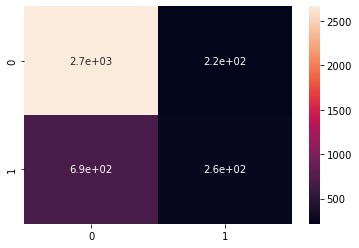

In [113]:
sns.heatmap(cfs_mtrix, annot=True)
plt.show()